# Module 3 Final Project Submission
* Student name: **Chelsea Power**
* Student pace: **part time**
* Scheduled project review date/time: **July 9, 2019 at 4:30 pm ET**
* Instructor name: **Joe San Pietro**
* Blog post URL: **TBD**

## Purpose

For this project, I will be using music streaming session data from Spotify to determine if a track will be played or skipped using the predictor **not_skipped**. https://developer.spotify.com/documentation/web-api/reference/object-model/


## Data Dictionary

* **track_id**: Unique identifier for the track played
* **duration**: Length of track in seconds
* **release_year**: Estimate of year the track was released
* **us_popularity_estimate**: Estimate of the US popularity percentile of the track as of October 12, 2018
* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* <span style="color:red">**beat_strength**: See accousticness?</span>
* <span style="color:red">**bounciness**: See accousticness?</span>
* <span style="color:red">**danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</span>
* <span style="color:red">**dyn_range_mean**: See accousticness?</span>
* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
* <span style="color:red">**flatness**: See accousticness?</span>
* **instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
* **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
* <span style="color:red">**mechanism**: See accousticness?</span>
* **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* <span style="color:red">**organism**: See accousticness?</span>
* **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* **time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* **acoustic_vector_0**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_1**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_2**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_3**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_4**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_5**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_6**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* **acoustic_vector_7**: http://benanne.github.io/2014/08/05/spotify-cnns.html
* <span style="color:green">**not_skipped**: Boolean indicating that the track was played
in its entirety</span>
* **hist_user_behavior_n_seekfwd**: Number of times the user did a seek forward within track
* **hist_user_behavior_n_seekback**: Number of times the user did a seek back within track
* **hour_of_day**: {0-23} - The hour of day
* <span style="color:gray">**premium**: Boolean indicating if the user was on premium or not. This has potential implications for skipping behavior.</span>

## Understand and Loading the Datasets

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

df_log = pd.read_csv('log_mini.csv')

#Look at size of the dataset
df_log.shape

(167880, 21)

In [2]:
#Look at the columns and first 10 rows of the dataset
df_log.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [3]:
#Rename column track_id_clean to track_id
df_log.rename(columns = {'track_id_clean':'track_id'}, inplace = True)

#Reorder colums in dataframe
df_log = df_log.reindex_axis(['track_id','session_id','session_position','session_length','skip_1',
                              'skip_2','skip_3','not_skipped','context_switch','no_pause_before_play',
                              'short_pause_before_play','long_pause_before_play',
                              'hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback',
                              'hist_user_behavior_is_shuffle','hour_of_day','date','premium','context_type',
                              'hist_user_behavior_reason_start','hist_user_behavior_reason_end'], axis=1)

#Confirm changes
df_log.head()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  # Remove the CWD from sys.path while we load stuff.


,track_id,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,False,False,False,True,0,0,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,False,False,False,True,0,1,...,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone


In [4]:
#Open second csv file
df_music = pd.read_csv('tf_mini.csv')

#Look at size of the dataset
df_music.shape

(50704, 30)

In [5]:
#Look at the columns and first 10 rows of the dataset
df_music.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795
2,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496
3,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753
4,t_d6990e17-9c31-4b01-8559-47d9ce476df1,369.600006,1951,99.991764,0.728831,0.371328,0.335115,0.483044,5.802681,0.721442,...,4,0.562343,0.131931,-0.292523,-0.174819,-0.034422,0.717229,-0.016239,-0.392694,-0.455496


In [6]:
#Merge CSV files into a single file based on track_id
df_music_log = pd.merge(df_music, df_log, on="track_id", how='inner')
df_music_log.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,...,0,0,0,True,10,2018-07-15,True,user_collection,trackdone,trackdone
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,0,0,0,False,23,2018-07-14,True,radio,trackdone,trackdone
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,...,0,0,0,False,23,2018-07-14,True,radio,backbtn,fwdbtn
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,...,1,0,0,False,22,2018-07-14,True,user_collection,trackdone,trackdone
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,...,1,0,0,False,20,2018-07-14,True,catalog,trackdone,endplay


## Data Preparation: Scrub the data

* Data type conversions (e.g. numeric data mistakenly encoded as objects)
* Detect and deal with missing values
* Remove unnecessary columns

In [7]:
# Look at new dataframe column types
df_music_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 50 columns):
track_id                           167880 non-null object
duration                           167880 non-null float64
release_year                       167880 non-null int64
us_popularity_estimate             167880 non-null float64
acousticness                       167880 non-null float64
beat_strength                      167880 non-null float64
bounciness                         167880 non-null float64
danceability                       167880 non-null float64
dyn_range_mean                     167880 non-null float64
energy                             167880 non-null float64
flatness                           167880 non-null float64
instrumentalness                   167880 non-null float64
key                                167880 non-null int64
liveness                           167880 non-null float64
loudness                           167880 non-null float64
mechanism

The following 16 **object** and **boolean** columns are unecessary and will be removed from the data set:

* **track_id**: numerical ordering with no valuable information
* **session_id**: numerical ordering with no valuable information
* **session_position**: numerical position of row within session
* **session_length**: numerical of rows within session
* **skip_1**: categorical with no valuable information
* **skip_2**: categorical with no valuable information
* **skip_3**: categorical with no valuable information
* **context_switch**: categorical indicating if the user changed context between the previous row and the current row
* **no_pause_before_play**: categorical indicating if there was no pause between playback of the previous track and this track
* **short_pause_before_play**: categorical indicating if there was a short pause between playback of the previous track and this track
* **long_pause_before_play**: categorical indicating if there was a long pause between playback of the previous track and this track
* **hist_user_behavior_is_shuffle**: categorical indicating if the user encountered this track while shuffle mode was activated
* **context_type**: object value on what type of context the playback occurred within
* **date**: numerical with no valuable information
* **hist_user_behavior_reason_start**: object value for the user action which led to the current track being played
* **hist_user_behavior_reason_end**: object value for the user action which led to the current track playback ending

In [8]:
df_music_log = df_music_log.drop(['track_id', 'session_id', 'session_position', 'session_length',
                                  'skip_1','skip_2','skip_3','context_switch','no_pause_before_play',
                                  'short_pause_before_play','long_pause_before_play',
                                  'hist_user_behavior_is_shuffle','context_type','date',
                                  'hist_user_behavior_reason_start','hist_user_behavior_reason_end'], axis=1)

In [9]:
#Check if there are any null/missing values
df_music_log.isna().sum()

duration                         0
release_year                     0
us_popularity_estimate           0
acousticness                     0
beat_strength                    0
bounciness                       0
danceability                     0
dyn_range_mean                   0
energy                           0
flatness                         0
instrumentalness                 0
key                              0
liveness                         0
loudness                         0
mechanism                        0
mode                             0
organism                         0
speechiness                      0
tempo                            0
time_signature                   0
valence                          0
acoustic_vector_0                0
acoustic_vector_1                0
acoustic_vector_2                0
acoustic_vector_3                0
acoustic_vector_4                0
acoustic_vector_5                0
acoustic_vector_6                0
acoustic_vector_7   

In [10]:
df_music_log.not_skipped.value_counts()

False    111996
True      55884
Name: not_skipped, dtype: int64

In [11]:
# Look at distributions for data
df_music_lin = df_music_log.drop(['mode','not_skipped','premium'], axis=1)
df_music_lin.hist(figsize = [30, 20]);

## Logistic Regression - Define X and Y

In [12]:
y = df_music_log['not_skipped']
X = df_music_log.drop('not_skipped', axis = 1)

## Normalize the Data
Normalize the data prior to fitting the model

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
from patsy import dmatrices

y, X = dmatrices('not_skipped ~ duration + release_year + us_popularity_estimate + acousticness + beat_strength + bounciness + danceability + dyn_range_mean + energy + flatness + instrumentalness + key + liveness + loudness + mechanism + C(mode) + organism + speechiness + tempo + time_signature + valence + acoustic_vector_0 + acoustic_vector_1 + acoustic_vector_2 + acoustic_vector_3 + acoustic_vector_4 + acoustic_vector_5 + acoustic_vector_6 + acoustic_vector_7 + hist_user_behavior_n_seekfwd + hist_user_behavior_n_seekback + hour_of_day + C(premium)', df_music_log, return_type = "dataframe")


In [15]:
x_feats = ['duration','release_year','us_popularity_estimate','acousticness','beat_strength',
            'bounciness','danceability','dyn_range_mean','energy','flatness','instrumentalness',
            'key','liveness','loudness','mechanism','mode','organism','speechiness','tempo',
            'time_signature','valence','acoustic_vector_0','acoustic_vector_1','acoustic_vector_2',
            'acoustic_vector_3','acoustic_vector_4','acoustic_vector_5','acoustic_vector_6',
            'acoustic_vector_7','hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback',
            'hour_of_day','premium']
X = pd.get_dummies(df_music_log[x_feats], drop_first=False)
y = df_music_log.not_skipped
X.head()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day,premium,mode_major,mode_minor
0,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,...,0.832467,-0.213871,-0.299464,-0.675907,0,0,10,True,1,0
1,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,...,0.371803,-0.420558,-0.213120,-0.525795,0,0,23,True,1,0
2,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,...,0.371803,-0.420558,-0.213120,-0.525795,0,0,23,True,1,0
3,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,...,0.411094,-0.187749,-0.387599,-0.433496,0,0,22,True,0,1
4,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,...,0.614825,-0.111419,-0.265953,-0.542753,0,0,20,True,1,0


In [16]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


## Train-Test Split

Split the data into train and test sets.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.4, random_state=20)

## Fit the model

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = True, C=1e12)
model_log = logreg.fit(X_train, y_train)
model_log

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [19]:
print(y_train.value_counts())
print(y_test.value_counts())

False    67197
True     33531
Name: not_skipped, dtype: int64
False    44799
True     22353
Name: not_skipped, dtype: int64


## Predict

In [20]:
#Predict against test set using Sigmoid function
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [21]:
y_hat_test = logreg.predict_proba(X_test)
y_hat_test[0]

array([0.69880778, 0.30119222])

In [22]:
logreg.predict_proba(X_train)

array([[0.63802437, 0.36197563],
       [0.66153467, 0.33846533],
       [0.66283969, 0.33716031],
       ...,
       [0.68491436, 0.31508564],
       [0.68876587, 0.31123413],
       [0.60551982, 0.39448018]])

63% chance 0 (False) and 36% chance of 1 (True)

## Initial evaluation

How may times was the classifier correct for the training set?

In [23]:
logreg.score(X_train, y_train)

0.6676395838297197

66% accuracy with the train set

### How may times was the classifier correct for the test set?

In [24]:
logreg.score(X_test, y_test)

0.6676644031451037

66% accuracy with the test set

In [25]:
logreg.coef_[0]

array([-1.34331179e-01,  7.73500745e-02,  3.62685731e-02,  7.33530041e-02,
        1.40623238e-01, -1.11971360e-01, -3.29955146e-02,  2.35962441e-02,
        7.69007765e-03, -2.16830291e-02,  4.08221315e-03, -4.10597722e-04,
       -1.31341141e-02, -1.33007354e-03, -1.82128447e-02, -5.29394411e-02,
        3.66147647e-03,  2.24238826e-03,  1.13509624e-03, -1.25648495e-02,
       -7.31566000e-02, -1.18665195e-01,  2.91846705e-02, -1.81473182e-01,
        5.90451546e-02, -9.31454490e-03,  9.32098435e-02,  1.68336508e-02,
       -4.89845142e-01,  2.00784107e-01, -2.65907102e-02,  2.47779753e-03,
        7.49658162e-03, -7.49658162e-03])

In [26]:
for feature, weight in zip(X.columns, logreg.coef_[0]):
    print("{} has a weight of : {}".format(feature, weight))

duration has a weight of : -0.13433117863830302
release_year has a weight of : 0.07735007452007911
us_popularity_estimate has a weight of : 0.03626857308558024
acousticness has a weight of : 0.07335300410997164
beat_strength has a weight of : 0.1406232378283988
bounciness has a weight of : -0.11197135956828048
danceability has a weight of : -0.03299551463896942
dyn_range_mean has a weight of : 0.023596244071527914
energy has a weight of : 0.00769007765313809
flatness has a weight of : -0.021683029127631853
instrumentalness has a weight of : 0.004082213149054849
key has a weight of : -0.00041059772232864927
liveness has a weight of : -0.013134114110811853
loudness has a weight of : -0.0013300735448326616
mechanism has a weight of : -0.018212844720852776
organism has a weight of : -0.05293944111646284
speechiness has a weight of : 0.003661476467752609
tempo has a weight of : 0.002242388258771431
time_signature has a weight of : 0.0011350962371719634
valence has a weight of : -0.012564849

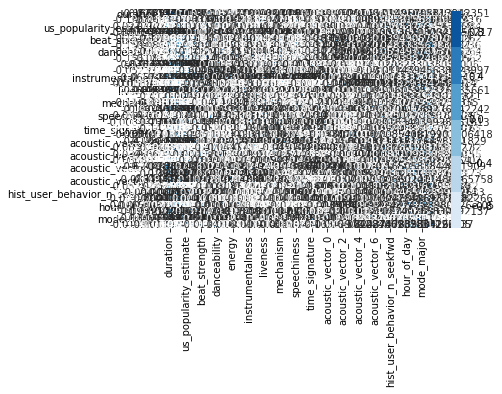

In [27]:
import seaborn as sns

sns.heatmap(X.corr(), cmap=sns.color_palette('Blues'), annot=True, fmt='0.16g')

## Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[67024   173]
 [33305   226]]


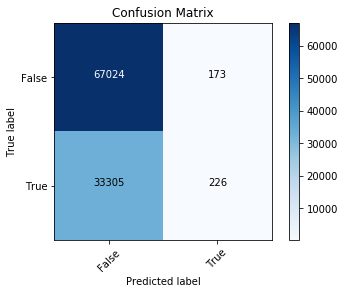

In [29]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

## ROC Metrics

Calculate the false positive rate and true positive rate (you can use the built in metrics from SciKit-Learn) of your classifier.

In [30]:
from sklearn.metrics import roc_curve, auc

#First calculate the probability scores of each of the datapoints:
y_score = model_log.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = model_log.decision_function(X_train)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

## ROC Graph

Plot the Receiver Operating Characteristic Curve for both the train and test sets using the false positive rate and true positive rate.

AUC: 0.5677247784253673


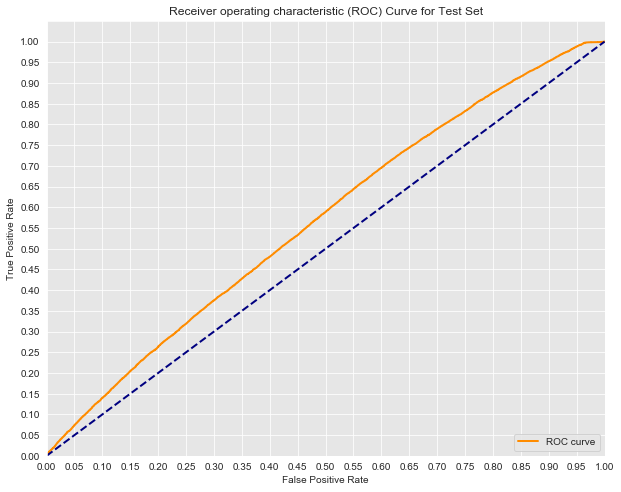

In [31]:
#Seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

#Test Set
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

AUC: 0.5689006898587337


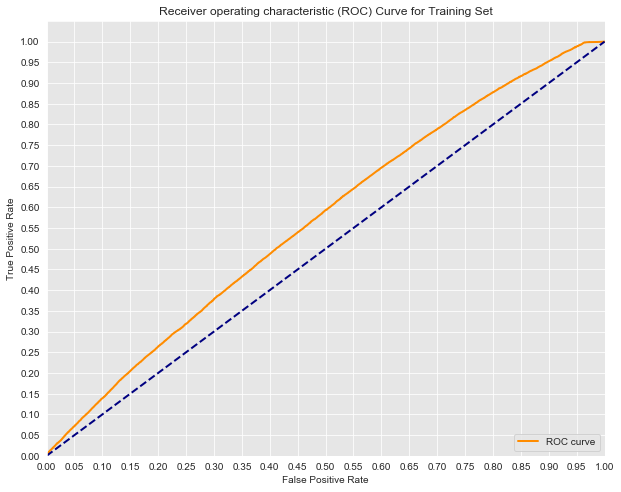

In [32]:
#Seaborn styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

#Training Set
plt.figure(figsize=(10,8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

## SMOTE - Balance Data

Improve the model's performance on the minority class.

In [33]:
from imblearn.over_sampling import SMOTE, ADASYN

print(y_train.value_counts()) #Previous original class distribution
X_train_resampled, y_train_resampled = SMOTE().fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

False    67197
True     33531
Name: not_skipped, dtype: int64
True     67197
False    67197
dtype: int64


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 0.001: 0.5677694991719862


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 0.01: 0.5677064918810963


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 0.1: 0.5677614583651671


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 1: 0.5677659131638779


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 10: 0.5677666391532666


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC for 100: 0.5677666171838491


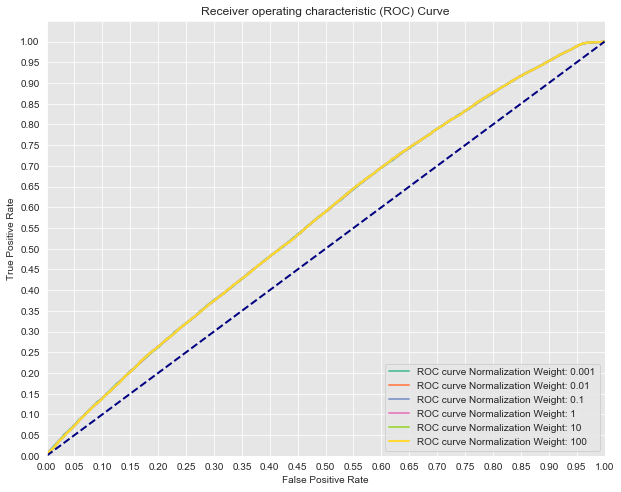

In [34]:
# Compare a few different regularization performances on the dataset:
C_param_range = [0.001,0.01,0.1,1,10,100]
names = [0.001,0.01,0.1,1,10,100]
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c) #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_hat_test, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[21701  8770]
 [23098 13583]]


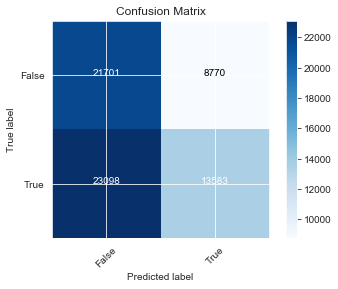

In [36]:
# Plot Confusion Matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

## Random Forest

Create a Decision Tree Classifier.

In [37]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
np.random.seed(0)

tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Feature Importance

Check the feature_importances_ attribute of our trained model to see what it displays.

In [38]:
tree_clf.feature_importances_

array([1.75896384e-01, 1.80176232e-02, 7.36240206e-02, 0.00000000e+00,
       1.48357125e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.02862267e-03, 1.65273797e-02, 0.00000000e+00,
       4.55641128e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.58968903e-02, 0.00000000e+00, 0.00000000e+00, 2.09238707e-03,
       3.04612411e-02, 2.30414759e-02, 4.87661247e-03, 0.00000000e+00,
       4.10418920e-01, 1.70486227e-01, 1.75222530e-03, 1.75222530e-04,
       0.00000000e+00, 0.00000000e+00])

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

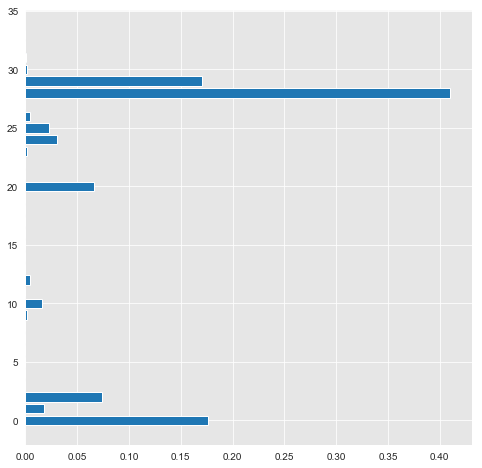

In [39]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

## Model performance

In [40]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[44702    97]
 [22224   129]]
              precision    recall  f1-score   support

       False       0.67      1.00      0.80     44799
        True       0.57      0.01      0.01     22353

   micro avg       0.67      0.67      0.67     67152
   macro avg       0.62      0.50      0.41     67152
weighted avg       0.64      0.67      0.54     67152



In [41]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 66.76%


### Create a RandomForestClassifier

In [42]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
# Check the training accuracy of the model using the .score() method
forest.score(X_train, y_train)

0.6677090779127949

In [44]:
# Check the testing accuracy of the model using the .score() method 
forest.score(X_test, y_test)

0.66753037884203

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

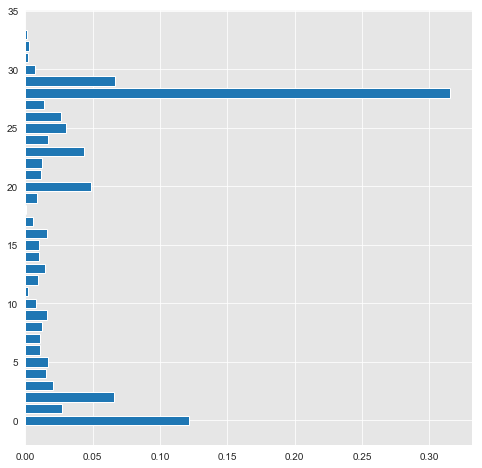

In [45]:
# Plot the feature importance
plot_feature_importances(forest)

In [46]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
rf_tree_1 = forest_2.estimators_[0]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

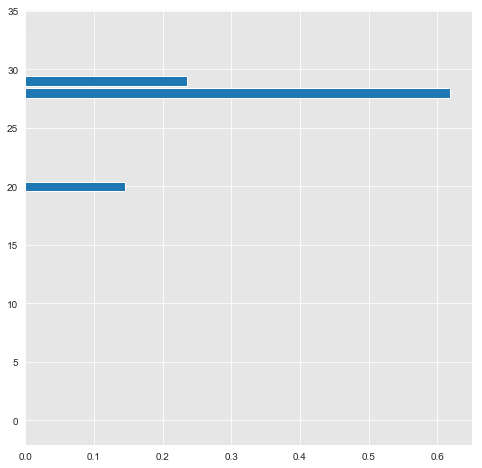

In [48]:
plot_feature_importances(rf_tree_1)